# P06 CTD χpod analysis

In [1]:
import dcpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seawater as sw

import eddydiff as ed
import xarray as xr

## Read CTD χpod data and convert to netCDF

In [102]:
ed.sections.to_netcdf(
    infile="/home/deepak/work/eddydiff/datasets/P06/P06.mat",
    outfile="/home/deepak/work/eddydiff/datasets/P06/p06-try-again.nc",
    transect_name="P06",
)

KeyError: 'grd'

In [80]:
matold = loadmat("/home/deepak/work/eddydiff/datasets/P06/P06-means.mat")
matold.keys()

dict_keys(['__header__', '__version__', '__globals__', 'lat', 'lon', 'dnum', 'TPvar', 'eps', 'chi', 'KT', 'dTdz', 'N2', 't', 's', 'P', 'Jq', 'dist'])

In [101]:
ed.sections.to_netcdf(
    infile="/home/deepak/work/eddydiff/datasets/P06/P06-new.mat",
    outfile="/home/deepak/work/eddydiff/datasets/P06/p06-new.nc",
    transect_name="P06",
)

______________________________________________________________________

______________________________________________________________________

## Read transect + ancillary datasets

In [53]:
import eddydiff as ed

p06 = xr.open_dataset("/home/deepak/work/eddydiff/datasets/P06/p06.nc")
bathy = p06.bathy.copy()
p06 = p06.where(p06["KT"] < 3e-3)
p06["bathy"] = bathy
p06["KtTz"] = p06.KT * p06.dTdz
p06

eccograd, argograd, cole, aber = ed.read_all_datasets(kind="monthly", transect=p06)

/home/deepak/miniconda3/envs/dcpy/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  This is separate from the ipykernel package so we can avoid doing imports until
/home/deepak/miniconda3/envs/dcpy/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


/home/deepak/anaconda3/lib/python3.6/site-packages/_pytest/fixtures.py:847: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  params = attr.ib(convert=attr.converters.optional(tuple))
/home/deepak/anaconda3/lib/python3.6/site-packages/_pytest/fixtures.py:849: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  ids = attr.ib(default=None, convert=_ensure_immutable_ids)


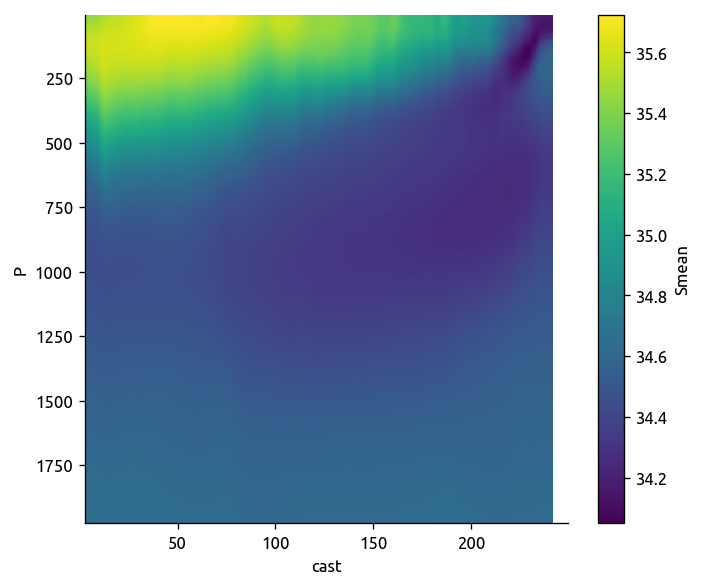

In [2]:
argograd.Smean.plot(x="cast", yincrease=False)

## plots

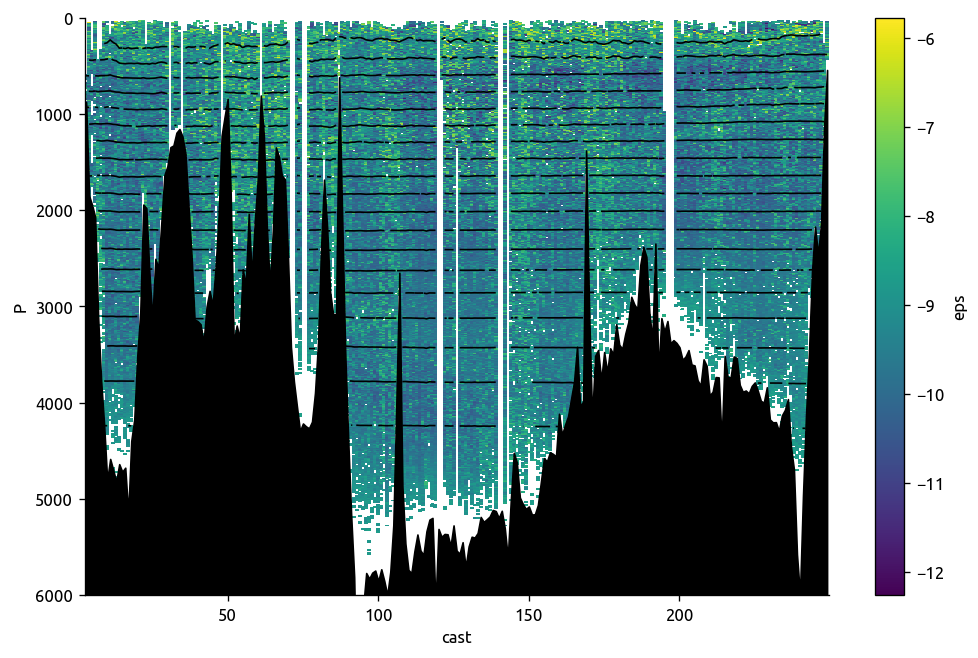

In [259]:
np.log10(p06.eps).plot(x="cast")
p06.rho.plot.contour(
    colors="k",
    x="cast",
    yincrease=False,
    levels=pd.qcut(p06.rho.values.ravel(), 20, retbins=True)[1],
)
plt.gca().fill_between(p06.cast, 6100, -p06.bathy, color="k", zorder=10)
plt.gcf().set_size_inches(10, 10 / 1.6)

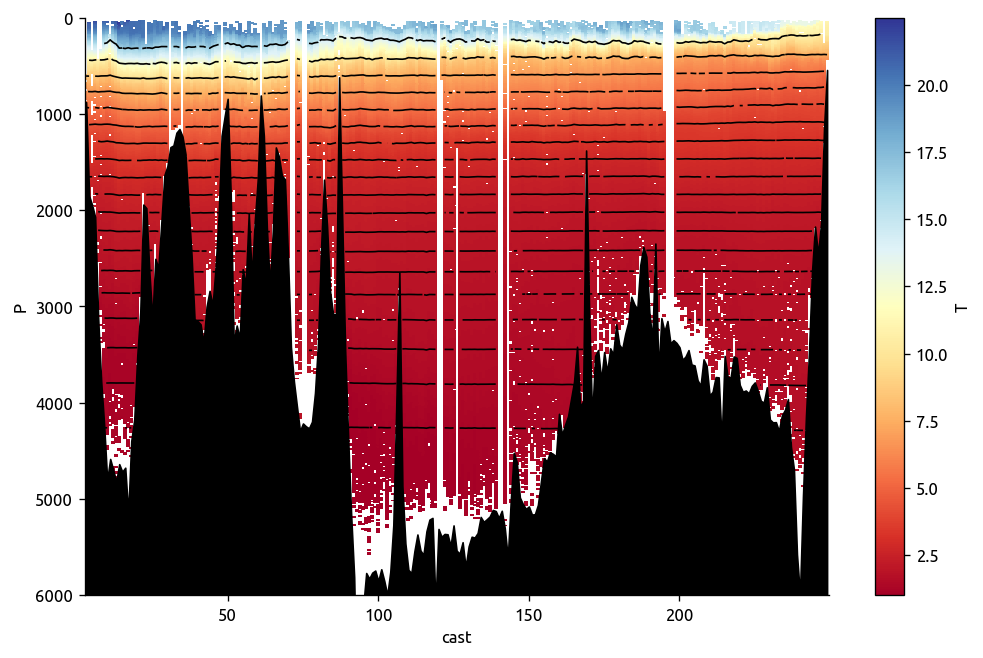

In [6]:
p06["T"].plot(x="cast", cmap=mpl.cm.RdYlBu)
p06.rho.plot.contour(
    colors="k",
    x="cast",
    yincrease=False,
    levels=pd.qcut(p06.rho.values.ravel(), 20, retbins=True)[1],
)
plt.gca().fill_between(p06.cast, 6100, -p06.bathy, color="k", zorder=10)
plt.gcf().set_size_inches(10, 10 / 1.6)

In [91]:
import sciviscolor as svc

svc.cm.

In [ ]:
p06

/home/deepak/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'labels'
  s)


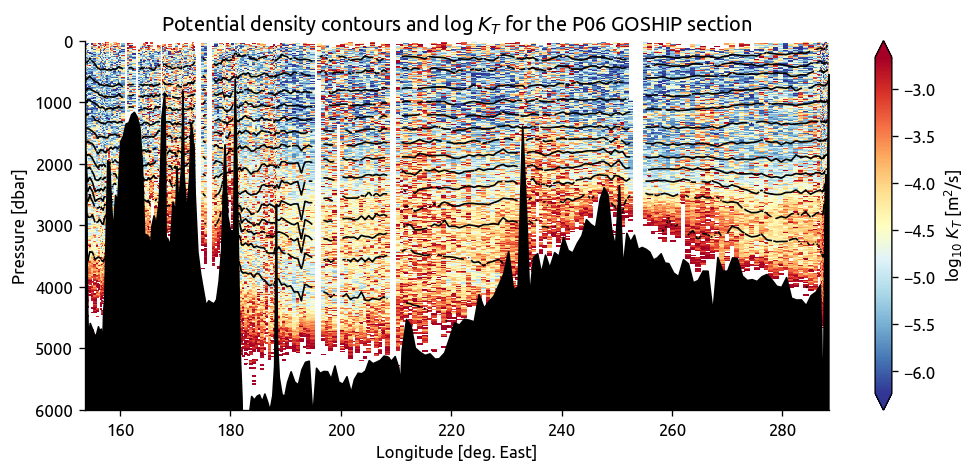

In [ ]:
%matplotlib inline

### p06['KT'].attrs['long_name'] = '$K_T$'
p06["KT"].attrs["units"] = "m$^2$/s"
p06["P"].attrs["long_name"] = "Pressure"
p06["P"].attrs["units"] = "dbar"
p06["lon"].attrs["long_name"] = "Longitude"
p06["lon"].attrs["units"] = "deg. East"

logKT = np.log10(p06["KT"])
logKT.attrs = p06.KT.attrs
logKT.attrs["long_name"] = "log$_{10}$ $K_T$"
logKT.plot(x="lon", y="P", cmap=mpl.cm.RdYlBu_r, robust=True)
(p06.sigma_4 - 1000).plot.contour(
    colors="k",
    x="lon",
    y="P",
    yincrease=False,
    labels=False,
    levels=pd.qcut(p06.sigma_4.values.ravel() - 1000, 15, retbins=True)[1],
)
plt.gca().fill_between(p06.lon, 6100, -p06.bathy, color="k", zorder=10)
plt.gcf().set_size_inches(10, 10 / 2.5)

plt.gca().set_title(
    "Potential density contours and log $K_T$ for the P06 GOSHIP section"
)

plt.savefig("../images/p06-kt.png", bbox_inches="tight")

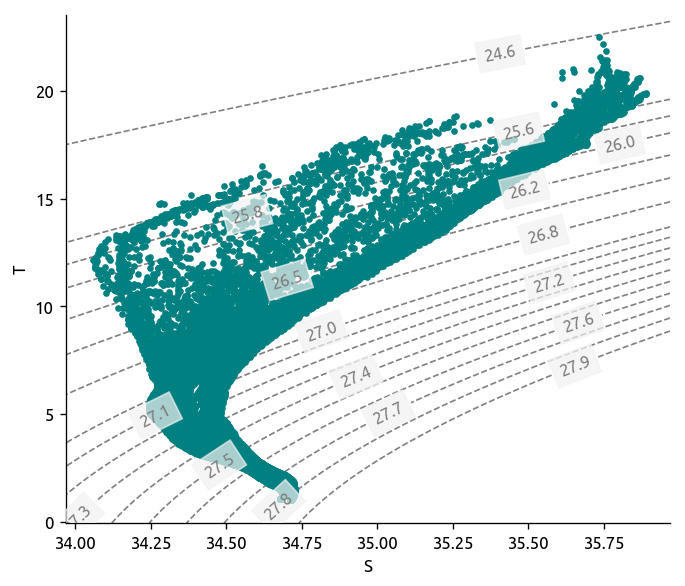

In [355]:
bins = [
    1024.6,
    1025.6,
    1025.8,
    1026.0,
    1026.25,
    1026.5,
    1026.75,
    1027.0,
    1027.1,
    1027.2,
    1027.3,
    1027.4,
    1027.5,
    1027.6,
    1027.7,
    1027.8,
    1027.9,
]
dcpy.oceans.TSplot(p06.S, p06["T"], p06.pres, rho_levels=bins)

______________________________________________________________________

______________________________________________________________________

## Calculate

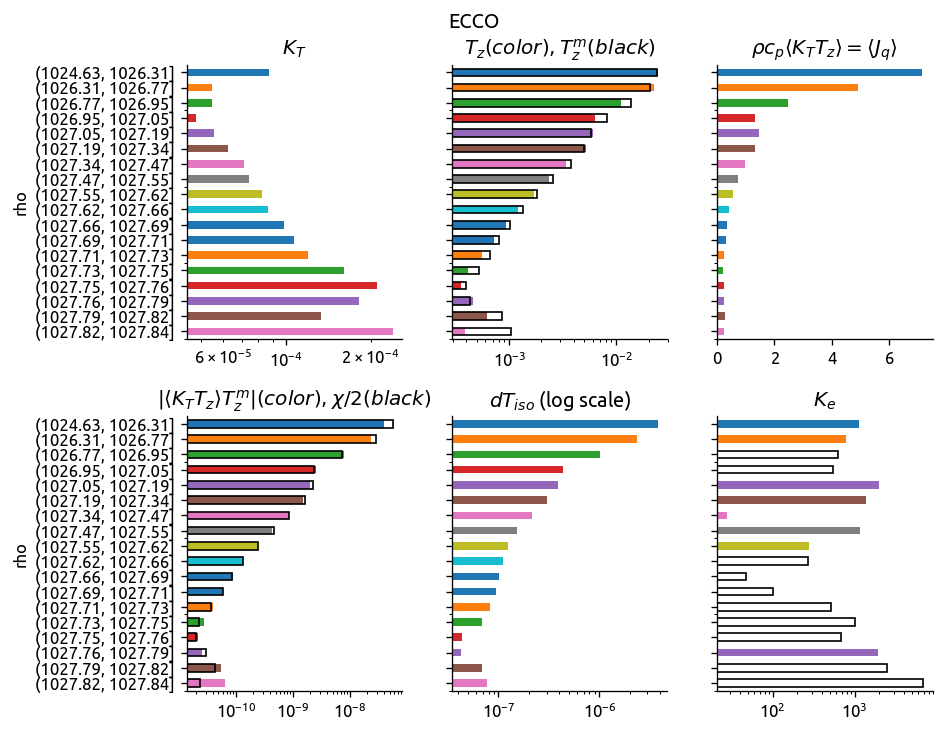

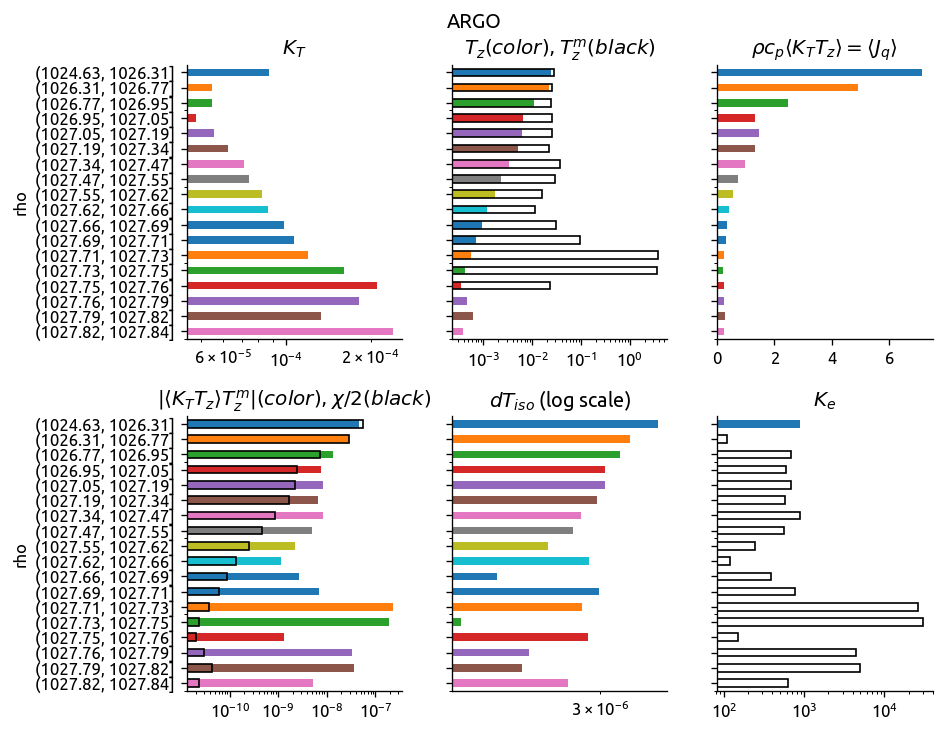

In [283]:
nbins = 18

p06["rho"] = p06["sigma_0"]
eccograd["ρmean"] = eccograd["sigma_0"]


eccoKe = ed.process_transect_1d(p06, eccograd, "ECCO", nbins=nbins)
ed.plot_bar_Ke(eccoKe, Ke_log=True)

argoKe = ed.process_transect_1d(p06, argograd, "ARGO", nbins=nbins)
ed.plot_bar_Ke(argoKe, Ke_log=True)

______________________________________________________________________

______________________________________________________________________

## Calculate 2

/home/deepak/miniconda3/envs/dcpy/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


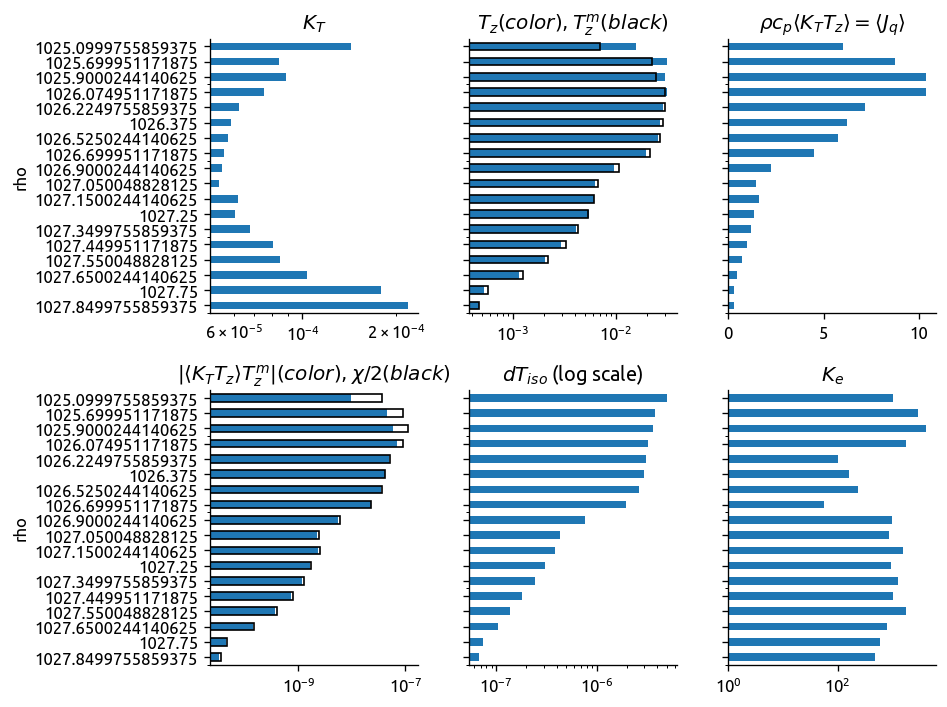

In [3]:
import eddydiff as ed

p06 = xr.open_dataset("/home/deepak/work/eddydiff/datasets/P06/p06.nc")
bathy = p06.bathy.copy()
p06 = p06.where(p06["KT"] < 1e-3)
p06["bathy"] = bathy
p06["KtTz"] = p06.KT * p06.dTdz
p06

if "eccograd" not in locals():
    eccograd, argograd, cole, aber = ed.read_all_datasets(kind="monthly", transect=p06)

# use sigma_0
p06["rho"] = p06["sigma_0"]
eccograd["ρmean"] = eccograd["sigma_0"]

bins = [
    1024.6,
    1025.6,
    1025.8,
    1026.0,
    1026.15,
    1026.3,
    1026.45,
    1026.6,
    1026.8,
    1027.0,
    1027.1,
    1027.2,
    1027.3,
    1027.4,
    1027.5,
    1027.6,
    1027.7,
    1027.8,
    1027.9,
]
trdens, bins = ed.bin_to_density_space(p06, bins=bins)

eccograd["dist"] = p06.dist
eccodens, _ = ed.bin_to_density_space(eccograd.rename({"ρmean": "rho"}), bins)

newKe = xr.Dataset()
newKe["KT"] = trdens.KT.mean(dim="cast")
newKe["chi"] = trdens.chi.mean(dim="cast")
newKe["KtTz"] = trdens.KtTz.mean(dim="cast")
newKe["dTiso"] = np.abs(eccodens.dTiso.mean(dim="cast"))
newKe["dTmdz"] = np.abs(eccodens.dTdz.mean(dim="cast"))
newKe["dTdz"] = trdens.dTdz.mean(dim="cast")

newKe["Ke"] = (newKe["chi"] / 2 - np.abs(newKe["KtTz"] * newKe["dTmdz"])) / (
    newKe["dTiso"] ** 2
)

ed.plot_bar_Ke(newKe.to_dataframe())

The above really awesome plot results after a few tweaks.

1. Doing things in σ_0.

1. Handcrafted density bins using the T-S diagram as guide.
   This is really important. Had to fiddle around slightly to not get negative
   values. Biggest improvement is that I can now resolve thermocline and coarsen
   the abyss. This is necessary because the big signal is in the thermocline and
   the abyssal values need to account for topography. Automatically choosing
   bins by pandas.cut/pandas.qcut would put too many bins down deep and fewer in
   the thermocline.

1. Throwing out all KT > 1e-3. This is really important. Will need to QC the
   values coming out of the CTD_chipod analysis code.

1. Redid (vectorized) the bin-averaging by cast. This is a better way to do it I
   think. Have to use pandas so I can groupby using multiple variables.

1. I tried fitting straight lines to the bin-averaged ECCO field to get dTiso
   but this seems to under-estimate values. Currently I bin-average dTiso and
   use that. This might not be crazy because it mirrors what I do with χ and we
   know that χ has to go along with the appropriate local gradients. i.e. if
   high χ coincides with high dTiso locally, we want the averaged dTiso to be
   biased high since averaged χ will be biased high.

/home/deepak/work/python/xarray/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


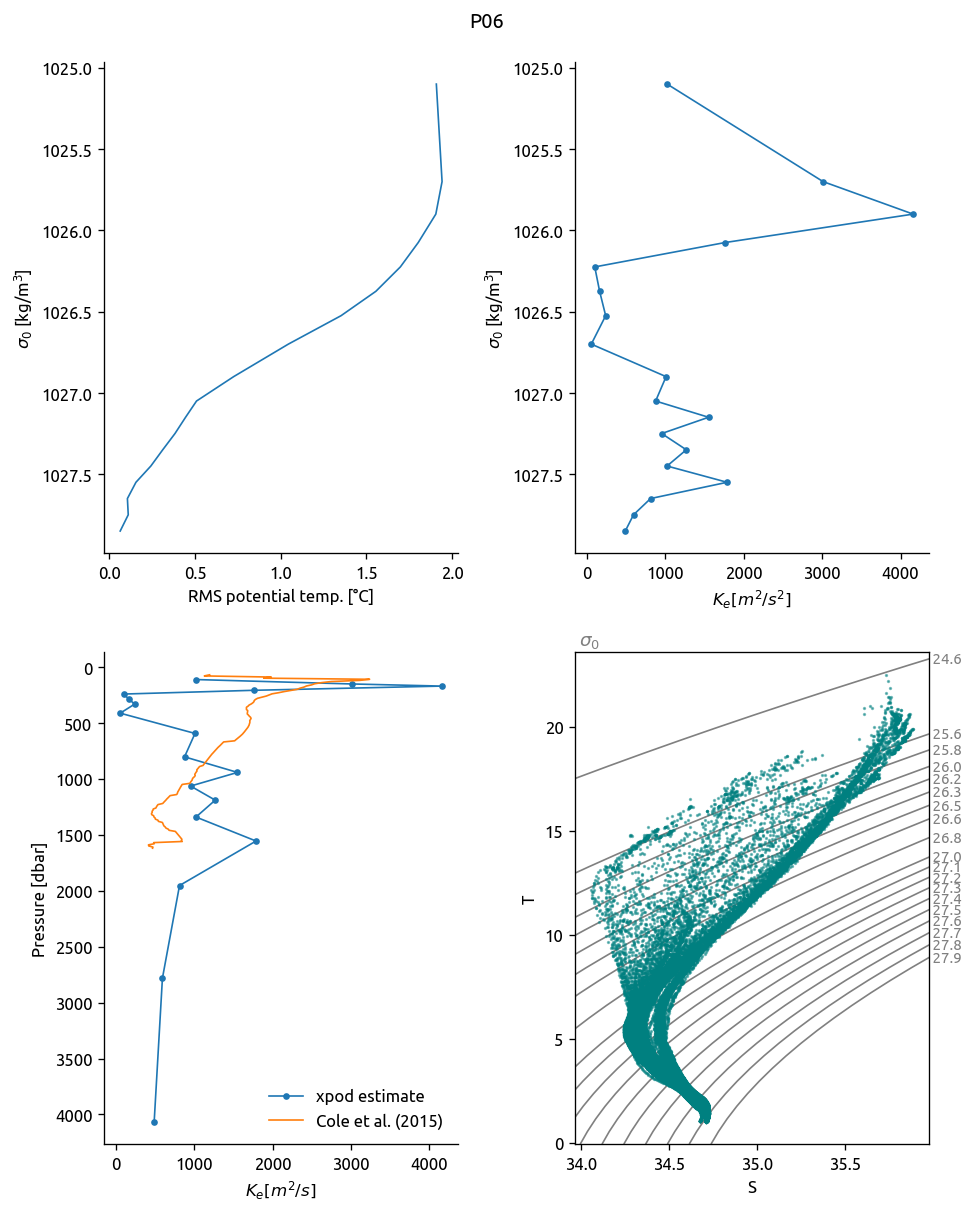

In [44]:
f, ax = plt.subplots(2, 2, constrained_layout=True)

Trms = trdens["T"].std(dim="cast")
Trms.name = "RMS potential temp."
Trms.attrs["units"] = "°C"
Trms.plot(ax=ax[0, 0], y="rho", yincrease=False)
newKe.Ke.where(newKe.Ke > 0).plot(marker=".", ax=ax[0, 1], y="rho", yincrease=False)
ax[0, 0].set_ylabel("$σ_0$ [kg/m$^3$]")
ax[0, 1].set_ylabel("$σ_0$ [kg/m$^3$]")
ax[0, 1].set_xlabel("$K_e [m^2/s^2]$ ")

ax[1, 0].plot(newKe.Ke.where(newKe.Ke > 0), trdens.P.mean(dim="cast"), ".-")
ax[1, 0].plot(cole.diffusivity.mean(dim="cast"), cole.P)
ax[1, 0].legend(["χpod estimate", "Cole et al. (2015)"])
ax[1, 0].invert_yaxis()
ax[1, 0].set_ylabel("Pressure [dbar]")
ax[1, 0].set_xlabel("$K_e [m^2/s]$ ")

dcpy.oceans.TSplot(
    p06.S,
    p06["T"],
    rho_levels=bins,
    hexbin=False,
    ax=ax[1, 1],
    size=1,
    plot_distrib=False,
)

f.suptitle(p06.transect_name)
f.set_size_inches(8, 10)

plt.savefig("../images/p06.png", bbox_inches="tight")

/home/deepak/work/python/xarray/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


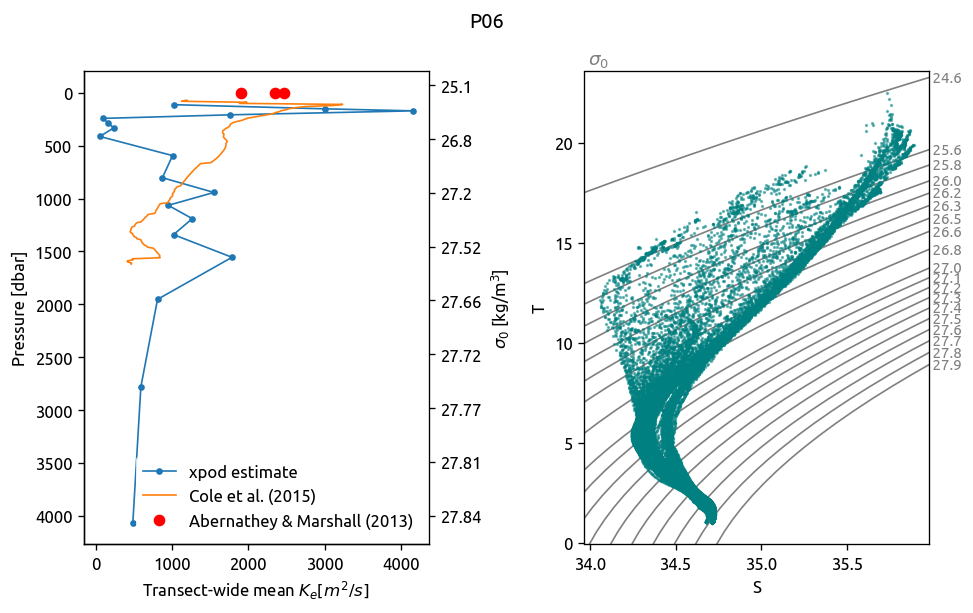

In [95]:
f, ax = plt.subplots(1, 2, constrained_layout=True)

zvec = trdens.P.mean(dim="cast")
rhovec = newKe.rho

ax[0].plot(newKe.Ke, zvec, ".-")
ax[0].plot(cole.diffusivity.mean(dim="cast"), cole.P)
ax[0].invert_yaxis()
ax[0].set_ylabel("Pressure [dbar]")
ax[0].set_xlabel("Transect-wide mean $K_e [m^2/s]$ ")

ax[0].spines["right"].set_visible(True)
ax[0].spines["top"].set_visible(True)

# https://matplotlib.org/gallery/subplots_axes_and_figures/fahrenheit_celsius_scales.html
ax_z = ax[0]
ax_rho = ax_z.twinx()
ax_rho.set_yticks(ax_z.get_yticks())
ax_rho.invert_yaxis()
ax_rho.set_yticklabels(
    [
        str(np.round(rr - 1000, 2))
        for rr in np.interp(ax_z.get_yticks(), zvec, rhovec.values)
    ]
)
ax_rho.set_ylabel("$σ_0$ [kg/m$^3$]")
ax_rho.set_ylim(ax_z.get_ylim())

ax[0].plot(
    [
        aber.mean(dim="cast").K_OC_LAT,
        aber.mean(dim="cast").K_OC_PSI,
        aber.mean(dim="cast").K_OC_SST,
    ],
    [0, 0, 0],
    "ro",
)
ax[0].legend(
    ["χpod estimate", "Cole et al. (2015)", "Abernathey & Marshall (2013)"],
    loc="lower right",
)

dcpy.oceans.TSplot(
    p06.S, p06.T, 0, rho_levels=bins, ax=ax[1], size=1, hexbin=False, plot_distrib=False
)

f.suptitle(p06.transect_name)
f.set_size_inches(8, 5)

# plt.savefig("../images/p06-Ke.png", bbox_inches="tight")

In [259]:
newKe.Ke.where(newKe.Ke > 0).isel(
    cast=slice(240)
)  # .coarsen(cast=5).mean().plot(x="cast", norm=mpl.colors.LogNorm(0.1, 5e3), robust=True)

TypeError: descriptor '_key' for 'ExplicitIndexer' objects doesn't apply to 'BasicIndexer' object

Linear fits to ECCO T along ρ surfaces in the along-transect direction doesn't work. The field has too much curvature

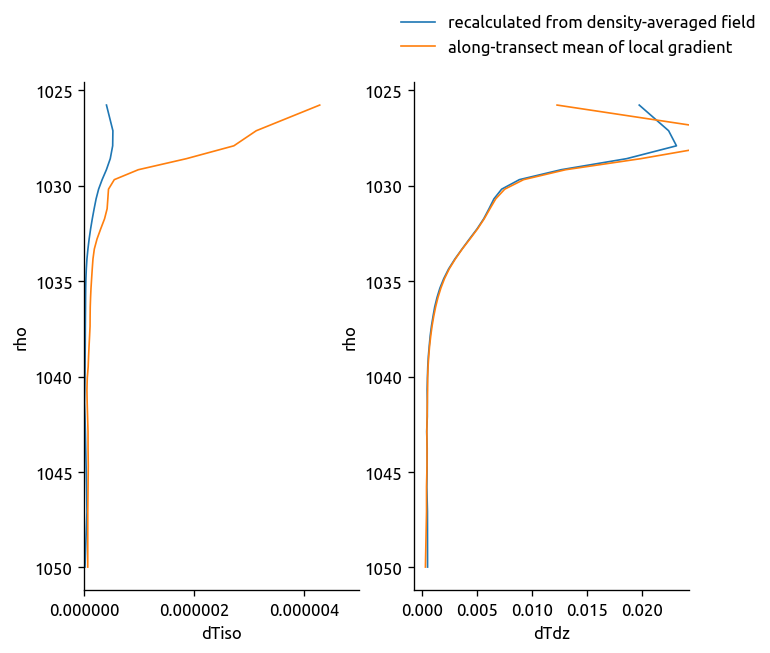

In [300]:
# recalculate gradients from mean fields in density space
dTiso = xr.ones_like(eccodens.rho) * np.nan
dTiso.name = "dTiso"
dTdz = xr.ones_like(eccodens.rho) * np.nan
dTdz.name = "dTdz"

for idx, rr in enumerate(eccodens.rho):
    Tvec = eccodens.Tmean.sel(rho=rr)
    mask = np.isnan(Tvec)
    if len(Tvec[~mask]) > 0:
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(
            eccodens.dist[~mask] * 1000, Tvec[~mask]
        )
    dTiso[idx] = slope

dTdz.values = -np.gradient(eccodens.Tmean.mean(dim="cast"), eccodens.P.mean(dim="cast"))

f, ax = plt.subplots(1, 2)
np.abs(dTiso).plot.line(ax=ax[0], y="rho")
np.abs(eccodens.dTiso).mean(dim="cast").plot.line(ax=ax[0], y="rho", yincrease=False)
ax[0].set_xlim([0, 5e-6])
f.legend(
    [
        "recalculated from density-averaged field",
        "along-transect mean of local gradient",
    ]
)

dTdz.plot(ax=ax[1], y="rho", yincrease=False)
eccodens.dTdz.mean(dim="cast").plot.line(ax=ax[1], y="rho", yincrease=False)

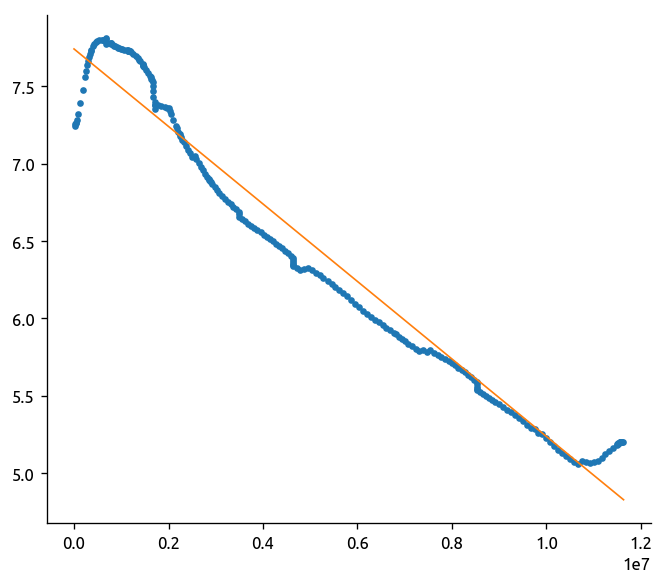

In [290]:
nn = 6

Tvec = eccodens.Tmean.isel(rho=nn)
mask = np.isnan(Tvec)
plt.plot(eccodens.dist[~mask] * 1000, Tvec[~mask], ".")

plt.plot(
    eccodens.dist * 1000,
    Tvec.mean() + dTiso.isel(rho=nn) * (eccodens.dist - eccodens.dist.mean()) * 1000,
)

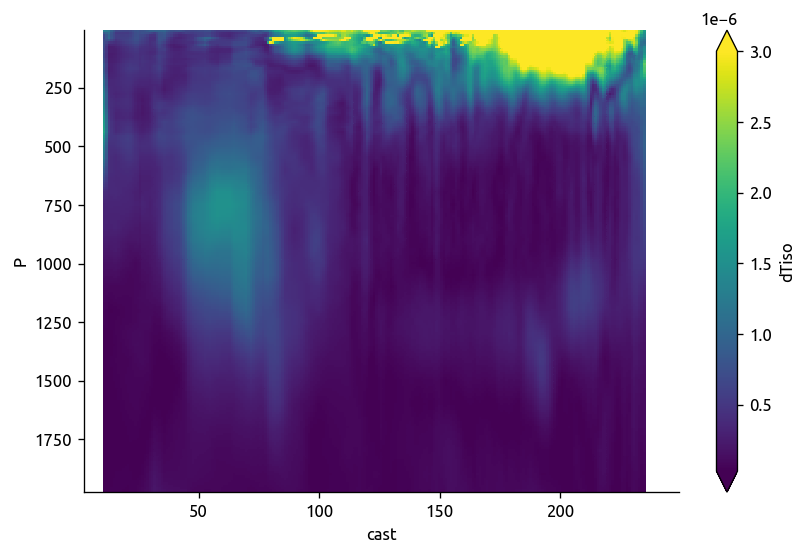

In [62]:
argograd.dTiso.mean("time").plot(x="cast", robust=True, yincrease=False)

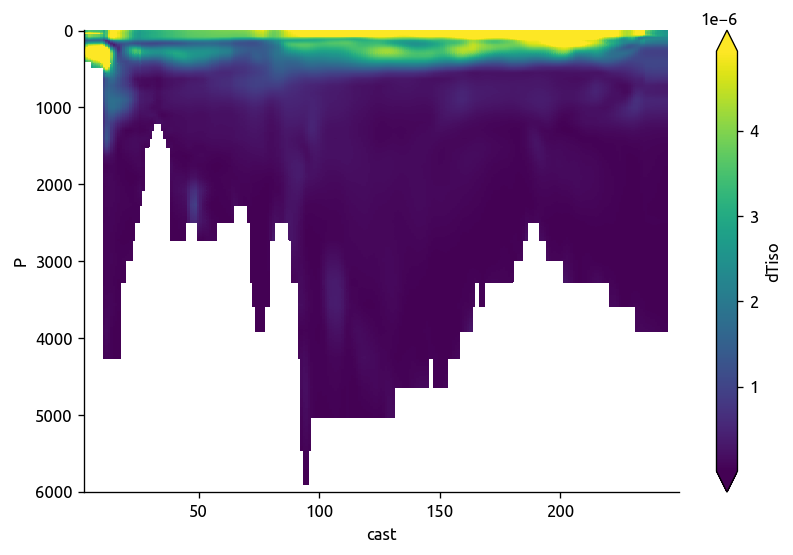

In [57]:
eccograd.dTiso.plot(x="cast", yincrease=False, robust=True)

In [22]:
clim = eccograd.copy()

clim = clim.to_dataframe().reset_index()

trmean, ρbins = ed.average_transect_1d(p06, nbins=15)

climrho = clim.groupby(pd.cut(clim.ρmean, ρbins, precision=1))

In [55]:
cole.diffusivity.plot(norm=mpl.colors.LogNorm(), x="cast", yincrease=False)

NameError: name 'mpl' is not defined

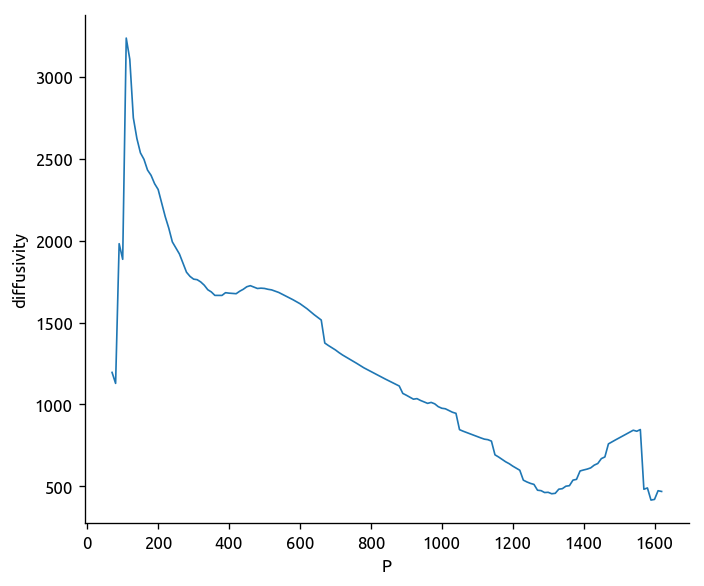

In [60]:
cole.diffusivity.mean(dim="cast").plot()

In [40]:
clim = eccograd.sel(time=9)
transect = p06.sel(P=slice(0, 2000))

trmean, ρbins = ed.average_transect_1d(transect, nbins=20)
gradmean = ed.average_clim(clim, transect, ρbins)

Ke = ed.estimate_Ke(trmean, gradmean)
Ke

,chi,KtTz,dTdz,dTmdz,dTiso,KT,Ke
rho,,,,,,,
"(1024.8000000000002, 1026.7]",1.340903e-07,1.843108e-06,0.021105,0.021170,4.694987e-06,0.000118,1271.439129
"(1026.7, 1027.5]",8.350073e-08,1.431120e-06,0.026548,0.023706,3.095114e-06,0.000058,816.732447
"(1027.5, 1028.2]",6.809042e-08,1.229691e-06,0.024866,0.026552,2.792055e-06,0.000053,178.802085
"(1028.2, 1028.9]",3.888472e-08,9.499299e-07,0.018603,0.019622,1.978210e-06,0.000053,205.196687
"(1028.9, 1029.4]",1.696346e-08,6.028373e-07,0.011949,0.011681,1.093078e-06,0.000053,1205.030222
"(1029.4, 1029.9]",1.025537e-08,4.112075e-07,0.008578,0.009867,4.934073e-07,0.000047,4396.180518
"(1029.9, 1030.4]",6.098227e-09,3.541930e-07,0.006906,0.006893,3.572366e-07,0.000053,4761.760099
"(1030.4, 1030.9]",5.922741e-09,3.396340e-07,0.006503,0.005814,3.952476e-07,0.000051,6315.357062
"(1030.9, 1031.4]",4.479737e-09,3.283833e-07,0.006106,0.005641,3.961862e-07,0.000056,2468.021433


In [19]:
def compare_transect_clim(transect, clim):

    f, ax = plt.subplots(3, 1, sharex=True, sharey=True)

    for aa, (trvar, climvar) in enumerate(
        zip(["T", "S", "rho"], ["Tmean", "Smean", "ρmean"])
    ):
        _, levels = pd.qcut(transect[trvar].values.ravel(), 20, retbins=True)

        (
            clim[climvar]
            .sel(**ed.get_region_from_transect(p06))
            .isel(lat=1)
            .plot.contour(
                ax=ax[aa],
                levels=levels,
                x="lon",
                add_colorbar=True,
                yincrease=False,
                cmap=mpl.cm.RdYlBu,
            )
        )
        (
            transect[trvar].plot.contour(
                ax=ax[aa], levels=levels, colors="k", x="lon", y="P", yincrease=False
            )
        )

    trname = (
        transect.attrs["transect_name"]
        if "transect_name" in transect.attrs
        else "transect"
    )
    f.suptitle("Compare " + trname + " vs " + clim.dataset, y=0.9)
    plt.gcf().set_size_inches((10, 12))


compare_transect_clim(p06, eccograd.sel(time=8))
plt.gca().set_ylim((2400, 0))
#  compare_transect_clim(p06, argograd)
# plt.gca().set_ylim((2400, 0))

ValueError: dimensions or multi-index levels ['time'] do not exist

______________________________________________________________________

______________________________________________________________________

## Calculate 3

In [196]:
%aimport eddydiff
import eddydiff as ed

In [201]:
ed.eddydiff.format_ecco2(kecco)

<xarray.Dataset>
Dimensions:     (lat: 360, lon: 720, pres: 50)
Coordinates:
  * lat         (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon         (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * pres        (pres) float64 1.0 2.0 3.0 4.0 5.0 ... 46.0 47.0 48.0 49.0 50.0
Data variables:
    Kgm_ECCOv4  (lat, lon, pres) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    title:          Bolus Velocity Coefficient (ECCO v4 Estimate; Forget et a...
    Format:         native grid (nctiles w. 52 tiles)
    source:         ECCO consortium (http://ecco-group.org/)
    institution:    MIT
    history:         files revision history :\n    2016/05/07 : release of re...
    references:     Forget, G., J.-M. Campin, P. Heimbach, C. N. Hill, R. M. ...
    _FillValue:     nan
    missing_value:  nan
    Conventions:    CF-1.6
    date:           10-May-2016

In [241]:
kecco = (
    xr.open_dataset("../datasets/ecco/interp_Kgm_ECCOv4.nc")
    .pipe(ed.eddydiff.format_ecco2)
    .Kgm_ECCOv4
)
kecco

<xarray.DataArray 'Kgm_ECCOv4' (lat: 360, lon: 720, pres: 50)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       ...,

       [[449.7568 , 269.2915 , 146.21722, ...,       nan,       nan,
               nan],
        [449.26746, 269.019  , 146.27124, ...,       nan,       nan,
               nan],
        [448.78452, 268.7531 , 146.32971, ...,       nan,       nan,
               nan],
        ...,
        [451.28967, 270.1708 , 146.09207, ...,       nan,       nan,
               nan],
        [450.76907, 269.86832, 146.12814, ...,       nan,       nan,
               nan],
        [450.25885, 269.57617, 146.1708 , ...,       nan,       nan,
               nan]],

       [[488.71448, 306.11115, 164.50214, ...,       nan,       nan,
               nan],
        [488.2017 , 305.6677 , 164.3479 , ...,       nan,       nan,
               nan],
        [487.69604, 305.23145, 164.19669, ...,       nan,       nan,
               nan],
        ...,
        [490.2769 , 307.46857, 164.97755, ...,       nan,       nan,
               nan],
        [489.7501 , 307.00974, 164.81644, ...,       nan,       nan,
               nan],
        [489.23047, 306.55817, 164.65837, ...,       nan,       nan,
               nan]],

       [[521.16046, 340.92065, 172.53606, ...,       nan,       nan,
               nan],
        [520.9415 , 340.68723, 172.3936 , ...,       nan,       nan,
               nan],
        [520.72534, 340.4571 , 172.25227, ...,       nan,       nan,
               nan],
        ...,
        [521.8189 , 341.62262, 172.96187, ...,       nan,       nan,
               nan],
        [521.60065, 341.38974, 172.82086, ...,       nan,       nan,
               nan],
        [521.38165, 341.15634, 172.6784 , ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float64 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * pres     (pres) float64 5.0 15.0 25.0 35.0 ... 5.039e+03 5.461e+03 5.906e+03
Attributes:
    long_name:  Bolus Velocity Coefficient (ECCO v4 Estimate; Forget et al 20...
    units:      m^2/s

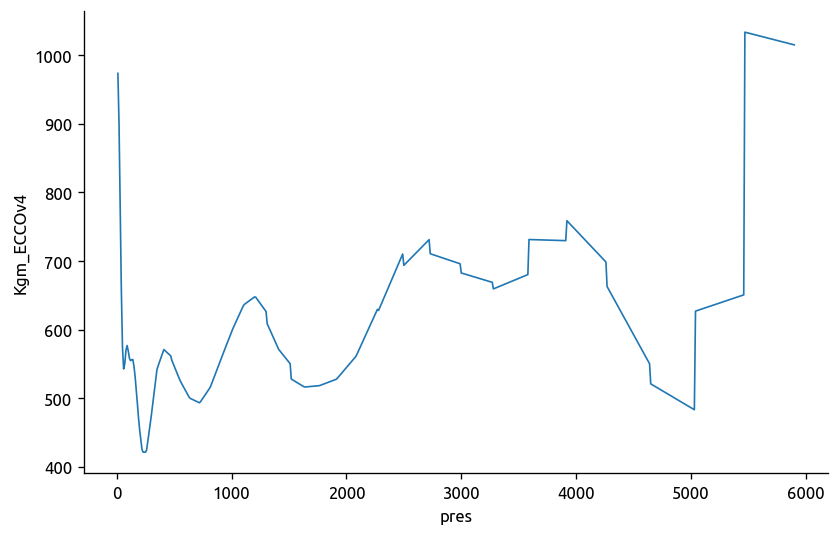

In [247]:
kecco.interp(lon=p06.lon, lat=p06.lat, pres=p06.P.values).mean("cast").plot()

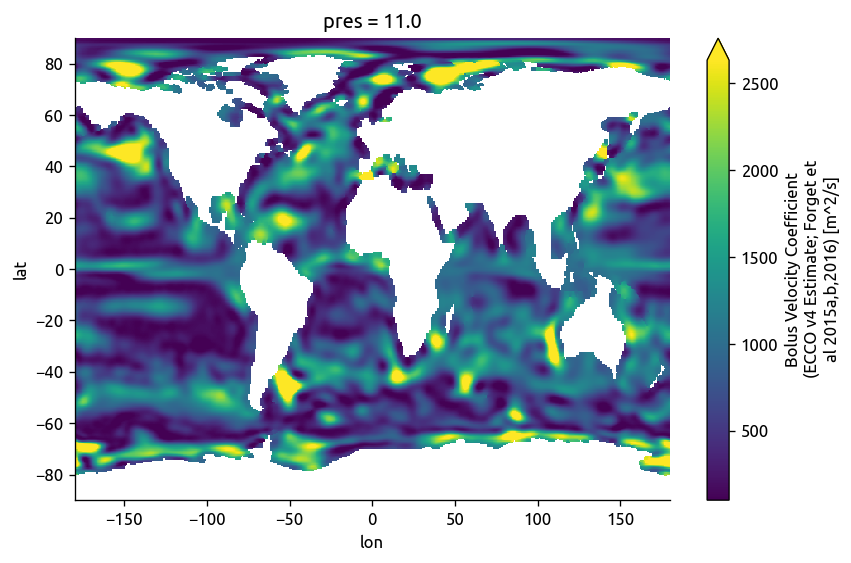

In [206]:
kecco.interp

In [122]:
newKe = xr.Dataset()
newKe["KT"] = trdens.KT  # .mean(dim="cast")
newKe["chi"] = trdens.chi  # .mean(dim="cast")
newKe["KtTz"] = trdens.KtTz  # .mean(dim="cast")
newKe["dTiso"] = np.abs(eccodens.dTiso)
newKe["dTmdz"] = np.abs(eccodens.dTdia)
newKe["dTdz"] = trdens.dTdz  # .mean(dim="cast")
newKe.coords["pres"] = trdens.pres.mean("cast")
# newKe = newKe.sel(cast=slice(242)).coarsen(cast=60).mean()
# newKe = newKe.mean("cast")
newKe["Ke"] = (newKe["chi"] / 2 - np.abs(newKe["KtTz"] * newKe["dTmdz"])) / (
    newKe["dTiso"] ** 2
)
# ed.plot_bar_Ke(newKe.to_dataframe())

In [101]:
fullmean = newKe

/home/deepak/work/python/xarray/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


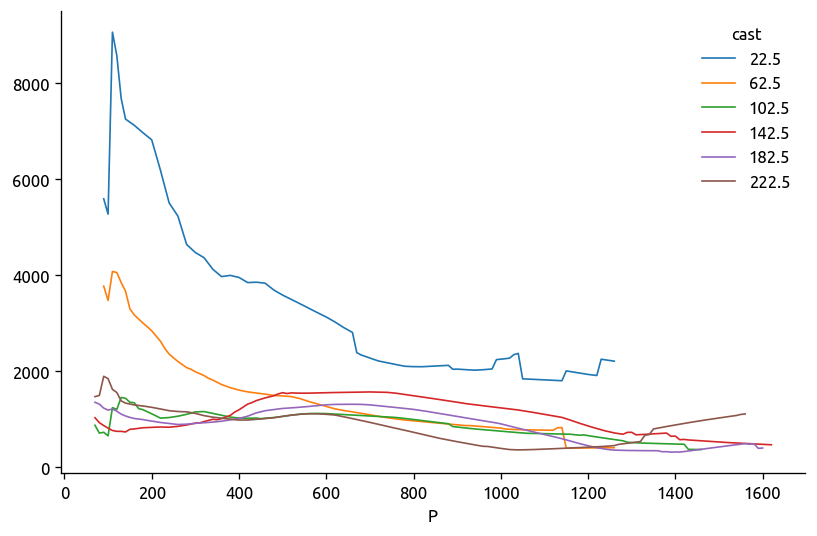

In [128]:
cole.diffusivity.sel(cast=slice(242)).coarsen(cast=40).mean().plot.line(hue="cast")

In [ ]:
fullmean.Ke.plot.line(hue="cast", y="pres", yincrease=False, color="k")
newKe.Ke.where(newKe.Ke > 0).plot(hue="cast", y="pres")

In [7]:
eccograd, argograd, cole, aber = ed.read_all_datasets(kind="monthly")

/home/deepak/miniconda3/envs/dcpy/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/deepak/miniconda3/envs/dcpy/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/deepak/miniconda3/envs/dcpy/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/deepak/miniconda3/envs/dcpy/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/deepak/miniconda3/envs/dcpy/lib/python3.7/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


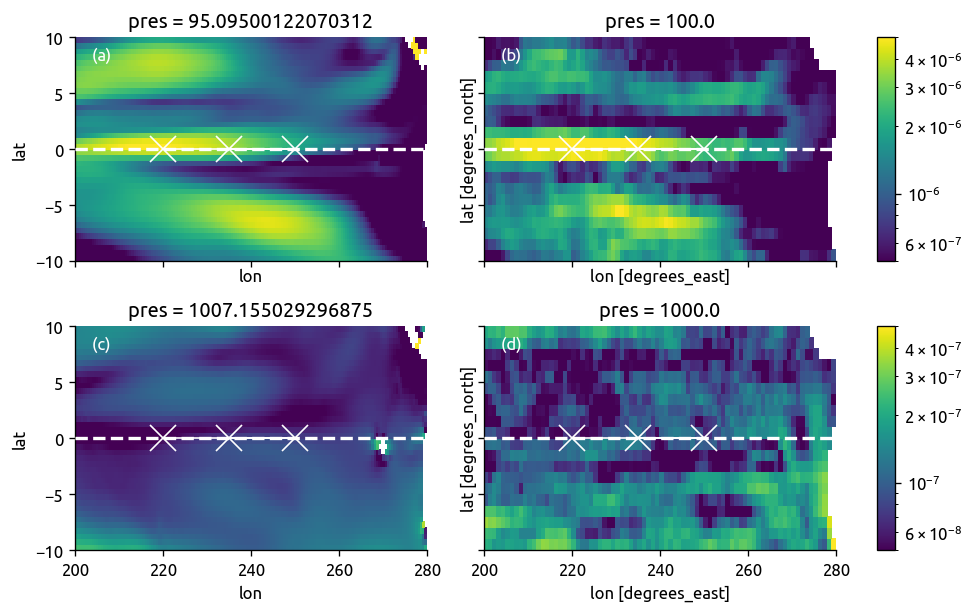

In [44]:
f, ax = plt.subplots(2, 2, sharex=True, sharey=True, constrained_layout=True)


def plot(ds, ax, norm):
    hdl = (
        ds.sel(lat=slice(-10, 10), lon=slice(200, 280))
        .mean("time")
        .plot(ax=ax, norm=norm, add_colorbar=False)
    )
    dcpy.plots.liney(0, ax=ax, zorder=10, color="w", lw=2)
    ax.plot([360 - 140, 360 - 110, 360 - 125], [0, 0, 0], marker="x", color="w", ms=16)
    return hdl


plot(
    eccograd.dTiso.sel(pres=100, method="nearest"),
    ax=ax[0, 0],
    norm=mpl.colors.LogNorm(5e-7, 5e-6),
)
h1 = plot(
    argograd.dTiso.sel(pres=100, method="nearest"),
    ax=ax[0, 1],
    norm=mpl.colors.LogNorm(5e-7, 5e-6),
)
plot(
    eccograd.dTiso.sel(pres=1000, method="nearest"),
    ax=ax[1, 0],
    norm=mpl.colors.LogNorm(5e-8, 5e-7),
)
h2 = plot(
    argograd.dTiso.sel(pres=1000, method="nearest"),
    ax=ax[1, 1],
    norm=mpl.colors.LogNorm(5e-8, 5e-7),
)

f.colorbar(h1, ax=ax[0, :])
f.colorbar(h2, ax=ax[1, :])

dcpy.plots.label_subplots(ax.flat, color="w")

f.savefig("../images/ecco-argo-grad-epac.png")

/home/deepak/miniconda3/envs/dcpy/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


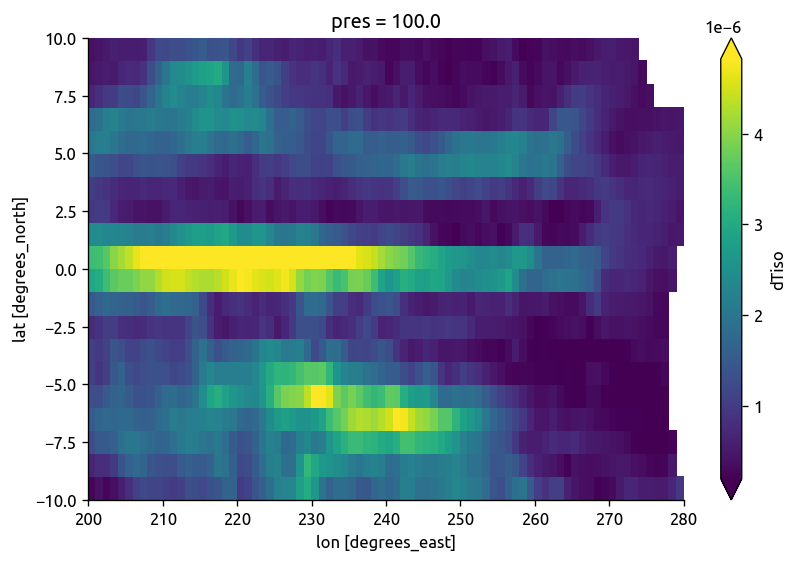

In [13]:
argograd.dTiso.sel(lat=slice(-10, 10), lon=slice(200, 280)).sel(
    pres=100, method="nearest"
).mean("time").plot(robust=True)